In [118]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### Read input

In [317]:
features_and_flourishing = pd.read_csv('../train_missing_post/features_and_flourishing_values_pre_label_all_no_missing_post_with_post_label.csv')
features_and_panas = pd.read_csv('../train_missing_post/features_and_panas_values_pre_label_all_no_missing_post_with_post_label.csv')

In [353]:
#features_and_flourishing = features_and_flourishing.rename(columns={'post_socre': 'post_score'})
features_and_panas

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,uid,activity_mean,activity_var,audio_mean,audio_var,bluetooth_sum,bluetooth_var,...,near_time_second,in_all_percentage,pre_positive,post_positive,pre_negative,post_negative,pre_positive_label,post_positive_label,pre_negative_label,post_negative_label
0,11,0,0,u00,0.349241,0.924555,0.231950,0.664766,0.549544,0.732848,...,0.348726,0.624395,32,31,33,24,1,1,1,1
1,22,1,1,u01,0.483003,0.980101,0.167804,0.297014,0.890670,0.894641,...,0.155153,0.838135,30,27,19,17,1,1,1,1
2,31,2,2,u02,0.641957,0.991142,0.466649,0.540162,0.330216,0.663491,...,0.834783,0.152821,23,28,15,13,1,1,1,0
3,17,3,3,u03,1.000000,0.997714,1.000000,1.000000,1.000000,0.959529,...,0.985731,0.012731,30,25,27,20,1,1,1,1
4,18,4,4,u04,0.000000,0.946310,0.000000,0.830575,0.489869,0.673099,...,0.669608,0.361376,27,34,14,19,1,1,1,1
5,23,5,5,u05,0.775667,0.986500,0.513226,0.769667,0.254286,0.000000,...,0.802091,0.192360,32,33,27,17,1,1,1,1
6,24,6,6,u07,0.610245,0.960285,0.516412,0.041188,0.822311,0.803701,...,0.758129,0.312693,30,16,21,17,1,0,1,1
7,32,8,8,u09,0.586158,0.987360,0.313325,0.769155,0.548430,0.535394,...,0.776015,0.210862,28,32,11,12,1,1,0,0
8,7,9,9,u10,0.744310,0.996814,0.515538,0.881323,0.000000,0.572105,...,0.922676,0.068482,33,43,20,28,1,1,1,1
9,33,12,12,u14,0.457708,0.912267,0.136934,0.229734,0.322423,0.537427,...,0.722215,0.266679,40,36,43,12,1,1,1,0


In [348]:
features_and_panas_neg = features_and_panas.iloc[:,3:].drop(columns = ['uid',
                                                                            'pre_positive',
                                                                            'post_positive',
                                                                            'pre_negative',
                                                                            'post_negative',
                                                                            'pre_positive_label',
                                                                            'post_negative_label',
                                                                            'post_positive_label'
                                                                           ])
features_and_panas_neg[:5]

,activity_mean,activity_var,audio_mean,audio_var,bluetooth_sum,bluetooth_var,bluetooth_mean,bluetooth_day_num,conversation_sum,conversation_var,...,phonecharge_mean,phonecharge_day_num,phonelock_sum,phonelock_var,phonelock_mean,phonelock_day_num,in_time_second,near_time_second,in_all_percentage,pre_negative_label
0,0.349241,0.924555,0.231950,0.664766,0.549544,0.732848,0.495022,0.264706,0.127208,0.595035,...,0.416777,0.500000,0.494530,0.647318,0.549495,0.113636,0.348794,0.348726,0.624395,1
1,0.483003,0.980101,0.167804,0.297014,0.890670,0.894641,0.919892,0.264706,0.031609,0.398812,...,0.880553,0.608696,0.353764,0.314931,0.302449,0.204545,0.508330,0.155153,0.838135,1
2,0.641957,0.991142,0.466649,0.540162,0.330216,0.663491,0.355197,0.000000,0.320835,0.318762,...,0.709891,0.086957,0.743367,0.830154,0.861874,0.136364,0.075746,0.834783,0.152821,1
3,1.000000,0.997714,1.000000,1.000000,1.000000,0.959529,1.000000,0.735294,1.000000,1.000000,...,0.558807,0.739130,0.772199,0.110290,0.643577,0.659091,0.255011,0.985731,0.012731,1
4,0.000000,0.946310,0.000000,0.830575,0.489869,0.673099,0.420698,0.264706,0.127504,0.915968,...,0.973175,0.260870,0.183892,0.345974,0.023715,0.250000,0.406917,0.669608,0.361376,1


In [349]:
X = features_and_panas_neg
y = features_and_panas['post_negative_label']

In [26]:
features_and_flourishing = features_and_flourishing.iloc[:,1:]

In [98]:
features_and_flourishing

,uid,activity_mean,activity_var,audio_mean,audio_var,bluetooth_sum,bluetooth_var,bluetooth_mean,bluetooth_day_num,conversation_sum,...,phonelock_var,phonelock_mean,phonelock_day_num,in_time_second,near_time_second,in_all_percentage,pre_score,post_score,pre_label,post_label
0,u00,0.349241,0.924555,0.231950,0.664766,0.549544,0.732848,0.495022,0.264706,0.127208,...,0.647318,0.549495,0.113636,0.348794,0.348726,0.624395,48,45,1,1
1,u01,0.483003,0.980101,0.167804,0.297014,0.890670,0.894641,0.919892,0.264706,0.031609,...,0.314931,0.302449,0.204545,0.508330,0.155153,0.838135,45,46,1,1
2,u02,0.641957,0.991142,0.466649,0.540162,0.330216,0.663491,0.355197,0.000000,0.320835,...,0.830154,0.861874,0.136364,0.075746,0.834783,0.152821,46,44,1,1
3,u03,1.000000,0.997714,1.000000,1.000000,1.000000,0.959529,1.000000,0.735294,1.000000,...,0.110290,0.643577,0.659091,0.255011,0.985731,0.012731,34,31,0,0
4,u04,0.000000,0.946310,0.000000,0.830575,0.489869,0.673099,0.420698,0.264706,0.127504,...,0.345974,0.023715,0.250000,0.406917,0.669608,0.361376,27,33,0,0
5,u05,0.775667,0.986500,0.513226,0.769667,0.254286,0.000000,0.213769,0.117647,0.472231,...,0.000000,0.472561,0.295455,0.164329,0.802091,0.192360,48,50,1,1
6,u07,0.610245,0.960285,0.516412,0.041188,0.822311,0.803701,0.775165,0.500000,0.636904,...,0.010939,0.263457,0.500000,0.597337,0.758129,0.312693,49,47,1,1
7,u09,0.586158,0.987360,0.313325,0.769155,0.548430,0.535394,0.505809,0.235294,0.000000,...,0.382686,0.307551,0.136364,0.120271,0.776015,0.210862,46,47,1,1
8,u10,0.744310,0.996814,0.515538,0.881323,0.000000,0.572105,0.000000,0.000000,0.379307,...,0.388509,0.319020,0.000000,0.028618,0.922676,0.068482,39,39,1,1
9,u14,0.457708,0.912267,0.136934,0.229734,0.322423,0.537427,0.245622,0.205882,0.086703,...,0.354351,0.332647,0.318182,0.173397,0.722215,0.266679,52,53,1,1


In [6]:
#features_and_panas = features_and_panas.iloc[:,1:]
#features_and_panas[:5]

### Train post value of Flourishing

In [269]:
# get all features and pre score of flourishing (rm uid, post, avg)
X = features_and_flourishing.drop(columns = ['pre_score','post_score','post_label']).iloc[:, 1:]
X[:5]

,activity_mean,activity_var,audio_mean,audio_var,bluetooth_sum,bluetooth_var,bluetooth_mean,bluetooth_day_num,conversation_sum,conversation_var,...,phonecharge_mean,phonecharge_day_num,phonelock_sum,phonelock_var,phonelock_mean,phonelock_day_num,in_time_second,near_time_second,in_all_percentage,pre_label
0,0.349241,0.924555,0.231950,0.664766,0.549544,0.732848,0.495022,0.264706,0.127208,0.595035,...,0.416777,0.500000,0.494530,0.647318,0.549495,0.113636,0.348794,0.348726,0.624395,1
1,0.483003,0.980101,0.167804,0.297014,0.890670,0.894641,0.919892,0.264706,0.031609,0.398812,...,0.880553,0.608696,0.353764,0.314931,0.302449,0.204545,0.508330,0.155153,0.838135,1
2,0.641957,0.991142,0.466649,0.540162,0.330216,0.663491,0.355197,0.000000,0.320835,0.318762,...,0.709891,0.086957,0.743367,0.830154,0.861874,0.136364,0.075746,0.834783,0.152821,1
3,1.000000,0.997714,1.000000,1.000000,1.000000,0.959529,1.000000,0.735294,1.000000,1.000000,...,0.558807,0.739130,0.772199,0.110290,0.643577,0.659091,0.255011,0.985731,0.012731,0
4,0.000000,0.946310,0.000000,0.830575,0.489869,0.673099,0.420698,0.264706,0.127504,0.915968,...,0.973175,0.260870,0.183892,0.345974,0.023715,0.250000,0.406917,0.669608,0.361376,0


In [48]:
y = features_and_flourishing['post_label']
y[:5]

0    1
1    1
2    1
3    0
4    0
Name: post_label, dtype: int64

In [34]:
# xgb require: label must be in [0, num_class)
# here add one to all pre_score(y) i.e. -1 -> 0, 0 -> 1, 1 -> 2
#y = y+1
#y[:5]

In [289]:
xgb.train?

**Gain** is the improvement in accuracy brought by a feature to the branches it is on. The idea is that before adding a new split on a feature X to the branch there was some wrongly classified elements, after adding the split on this feature, there are two new branches, and each of these branch is more accurate (one branch saying if your observation is on this branch then it should be classified as 1, and the other branch saying the exact opposite).

**gain**: the average gain across all splits the feature is used in.

**total_gain**: the total gain across all splits the feature is used in.

---

**weight**: the number of times a feature is used to split the data across all trees.

---

**Cover** measures the relative quantity of observations concerned by a feature.

**cover**: the average coverage across all splits the feature is used in.

**total_cover**: the total coverage across all splits the feature is used in.

The Cover metric means the relative number of observations related to this feature. For example, if you have 100 observations, 4 features and 3 trees, and suppose feature1 is used to decide the leaf node for 10, 5, and 2 observations in tree1, tree2 and tree3 respectively; then the metric will count cover for this feature as 10+5+2 = 17 observations. This will be calculated for all the 4 features and the cover will be 17 expressed as a percentage for all features' cover metrics.

In [37]:
importance_type = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
#model.get_score(importance_type=importance_type[2])

In [ ]:
# Customize loss function, and evaluation metric
# https://github.com/dmlc/xgboost/blob/master/demo/guide-python/custom_objective.py

### Try cross validation

In [192]:
#https://github.com/dmlc/xgboost/blob/master/demo/guide-python/cross_validation.py

# do cross validation, this will print result out as
# [iteration]  metric_name:mean_value+std_value
# std_value is standard deviation of the metric

# use merror or mlogloss for multi-class classification
res = xgb.cv(params, dtrain, 20, nfold=4,
       metrics={'merror'}, seed=0)
#     callbacks=[xgb.callback.print_evaluation(show_stdv=True)])
print(res)

    train-merror-mean  train-merror-std  test-merror-mean  test-merror-std
0            0.230263          0.040491          0.226190         0.132030
1            0.205263          0.005263          0.309524         0.023809
2            0.205263          0.005263          0.309524         0.023809
3            0.205263          0.005263          0.309524         0.023809
4            0.205263          0.005263          0.309524         0.023809
5            0.205263          0.005263          0.309524         0.023809
6            0.205263          0.005263          0.309524         0.023809
7            0.205263          0.005263          0.309524         0.023809
8            0.205263          0.005263          0.309524         0.023809
9            0.205263          0.005263          0.309524         0.023809
10           0.205263          0.005263          0.309524         0.023809
11           0.217763          0.019102          0.309524         0.023809
12           0.205263    

### Removing useless features and Rerun experiments

In [68]:
def calculate_accuracy_xgboost(model, y_test, pred_test):
    # calculate accuracy
    cnt1 = 0
    cnt2 = 0
    correct_indices = []
    for i in range(len(y_test)):
        if pred_test[i] == y_test[i]:
            cnt1 += 1
            correct_indices.append(i)
        else:
            cnt2 += 1

    print('Correct indices: ', correct_indices)
    print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

    # show feature importance
    xgb.plot_importance(model)
    plt.show()


def train_xgboost_shuffle(X, y):
    # get feature names from dataframe X
    feature_names = X.columns
    
    # convert dataframe to numpy arrays
    X_matrix = X.values
    y_matrix = y.values

    # try shuffle and split, add randomise to training
    folds = 1
    shuffle = ShuffleSplit(n_splits=folds, test_size=0.33)
    for fold, (train_index, test_index) in enumerate(shuffle.split(X_matrix, y_matrix)):
        X_train = X_matrix[train_index]
        y_train = y_matrix[train_index]
        X_test = X_matrix[test_index]
        y_test = X_matrix[test_index]
        
        dtrain = xgb.DMatrix(X_train, y_train, feature_names=feature_names)
        dtest = xgb.DMatrix(X_test, feature_names=feature_names)
        
        # run 500 times
        num_rounds = 500
        # train xgboost model
        model = xgb.train(param_list, dtrain, num_rounds, 
                          evals = [(dtrain, 'train')],
                          early_stopping_rounds = 10)
        
        print('Training:')
        pred_train = model.predict(dtrain)
        calculate_accuracy_xgboost(model, y_train, pred_train)
        
        print('Testing:')
        pred_test = model.predict(dtest)
        calculate_accuracy_xgboost(model, y_test, pred_test)

    
    # cross validation
    print('Cross validation:')
    training_size = X_train.shape[0]
    res = xgb.cv(params, dtrain, 50, nfold = training_size, #nfold=4,
                metrics={'auc'}, seed=0, as_pandas=True,
                early_stopping_rounds = 10)
    # metrics: mlogloss, merror
    #     callbacks=[xgb.callback.print_evaluation(show_stdv=True)])
    #print(res)
    display(res.describe())
    print()
    
    return model

In [112]:
def train_xgboost(X, y):
    # get feature names from dataframe X
    feature_names = X.columns
    
    # convert dataframe to numpy arrays
    X_matrix = X.values
    y_matrix = y.values

    # split data to training and testing sets
    # 2/3 for training, 1/3 for testing
    X_train, X_test, y_train, y_test = train_test_split(X_matrix, y_matrix, 
                                    test_size=0.33, random_state=1234565)
    dtrain = xgb.DMatrix(X_train, y_train, feature_names=feature_names)
    dtest = xgb.DMatrix(X_test, feature_names=feature_names)

    
    # run 100 times
    num_rounds = 100
    # train xgboost model
    model = xgb.train(param_list, dtrain, num_rounds, 
                      evals = [(dtrain, 'train')],
                      early_stopping_rounds = 10)
    
    # predict label for training data
    print('Training:')
    pred_train = model.predict(dtrain)

    calculate_accuracy_xgboost(model, y_train, pred_train)

    # use the model to predict post score for testset
    print('Testing:')
    pred_test = model.predict(dtest)
    calculate_accuracy_xgboost(model, y_test, pred_test)
    
    # cross validation
    print('Cross validation:')
    training_size = X_train.shape[0]
    res = xgb.cv(params, dtrain, 50, nfold = training_size, #nfold=4,
                metrics={'error'}, seed=0, as_pandas=True,
                early_stopping_rounds = 10)
    # metrics: error, logloss, auc...
    #     callbacks=[xgb.callback.print_evaluation(show_stdv=True)])
    #print(res)
    display(res.describe())
    print()
    
    return model

In [170]:
def train_xgboost(X, y):
    # get feature names from dataframe X
    feature_names = X.columns
    
    # convert dataframe to numpy arrays
    X_matrix = X.values
    y_matrix = y.values

    # split data to training and testing sets
    # 2/3 for training, 1/3 for testing
    X_train, X_test, y_train, y_test = train_test_split(X_matrix, y_matrix, 
                                    test_size=0.33, random_state=1234565)
    dtrain = xgb.DMatrix(X_train, y_train, feature_names=feature_names)
    dtest = xgb.DMatrix(X_test, feature_names=feature_names)
    
    model = xgb.train(param_list, dtrain)

    # predict label for training data
    print('Training:')
    pred_train = model.predict(dtrain)
    # print accuracy
    for i in range(len(pred_train)):
        if pred_train[i] >= 0.5:
            pred_train[i] = 1
        else:
            pred_train[i] = 0
    print("Accuracy for model: %.2f" % (accuracy_score(y_train, pred_train) * 100))

    
    # use the model to predict post score for testset
    print('Testing:')
    pred_test = model.predict(dtest)
    # print accuracy
    for i in range(len(pred_test)):
        if pred_test[i] >= 0.5:
            pred_test[i] = 1
        else:
            pred_test[i] = 0
    print("Accuracy for model: %.2f" % (accuracy_score(y_test, pred_test) * 100))

    # show feature importance
    xgb.plot_importance(model)
    plt.show()
    
    return model

In [156]:
xgb.train?

In [159]:
# some xgboost params introduction: https://zhuanlan.zhihu.com/p/31182879

# param eta:
# e.g. first tree y_predict = 3.3，label = 4.0，
# if eta = 0.3，then, second tree's training residual = 4.0-3.3*0.3（eta)=3.01.
param_list = {
    'booster': 'gbtree', # tree based model another opt - gblinear
    'objective': 'binary:logistic', # binary classification
    #'eval_metric': "rmse",
    #'gamma': 0.1, # min loss reduction required to make a split [0,inf]
    #'max_depth': 6, # [1,inf] default 6
    #'lambda': 2, 
    #'subsample': 1, # subsample ratio for training robust overfitting [0,1]
    #'colsample_bytree': 0.7, # subsample ratio of columns select to construct tree
    #'min_child_weight': 1, # min sum of instance weight needed in a child [0,inf] default 1
    #'silent': 1,
    #'eta': 0.02, # learning rate [0,1] default 0.3 step size shrinkage (prevents overfitting)
    'seed': 1000,
    'nthread': 4,
}

Training:
Accuracy for model: 91.30
Testing:
Accuracy for model: 75.00


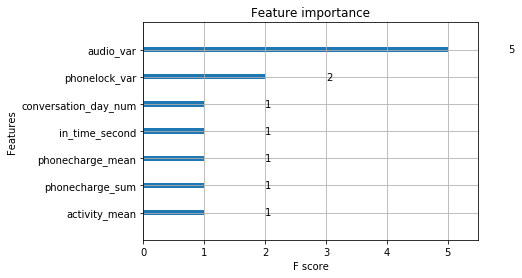

Feature gain: 


{'activity_mean': 1.86151314,
 'audio_var': 1.1849271538,
 'phonecharge_sum': 1.39571238,
 'phonelock_var': 0.0261118412,
 'phonecharge_mean': 1.21209955,
 'in_time_second': 1.07444692,
 'conversation_day_num': 0.932508409}

In [180]:
model = train_xgboost(X, y)
print('Feature gain: ')
model.get_score(importance_type='gain')

Training:
Accuracy for model: 91.30
Testing:
Accuracy for model: 75.00


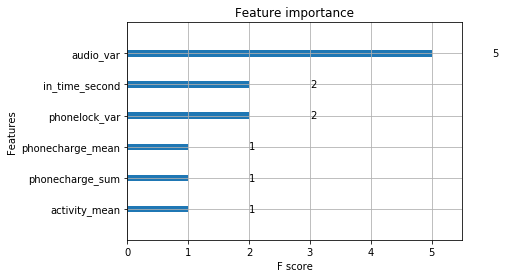

Feature gain: 


{'activity_mean': 1.86151314,
 'audio_var': 1.183458388,
 'phonecharge_sum': 1.39571238,
 'phonelock_var': 0.0261118412,
 'phonecharge_mean': 1.21209955,
 'in_time_second': 0.9761801674999999}

In [172]:
# remove gain below 0.2
X1 = X.drop(columns = ['conversation_day_num',
                      'conversation_sum',
                      'conversation_mean',
                      'dark_day_num',
                      'dark_mean',
                      'phonelock_mean',
                      'phonelock_day_num'])
model = train_xgboost(X1, y)
print('Feature gain: ')
model.get_score(importance_type='gain')

Training:
Accuracy for model: 91.30
Testing:
Accuracy for model: 75.00


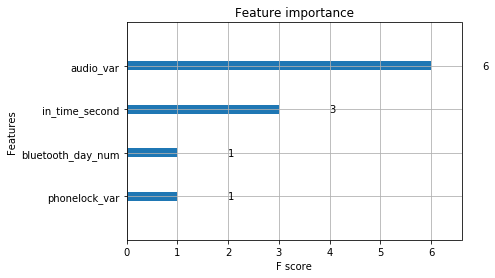

Feature gain: 


{'audio_var': 0.9176891848333334,
 'in_time_second': 1.2888156786666667,
 'phonelock_var': 0.766555786,
 'bluetooth_day_num': 0.777739525}

In [173]:
# select gain > 0.4
X1 = X[['activity_var',
        'in_time_second',
        'audio_var',
        'bluetooth_day_num',
        'phonelock_var',
        'near_time_second'
       ]]
model = train_xgboost(X1, y)
print('Feature gain: ')
model.get_score(importance_type='gain')

Training:
Accuracy for model: 91.30
Testing:
Accuracy for model: 75.00


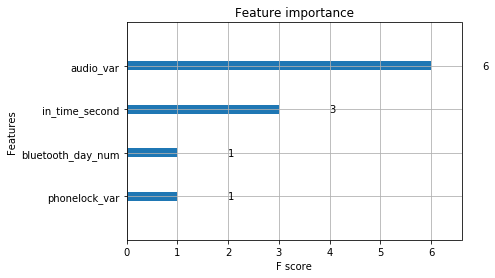

Feature gain: 


{'audio_var': 0.9176891848333334,
 'in_time_second': 1.2888156786666667,
 'phonelock_var': 0.766555786,
 'bluetooth_day_num': 0.777739525}

In [174]:
# LOWEST TEST ERROR MEAN select gain > 0.45
X1 = X[['activity_var',
        'in_time_second',
        'audio_var',
        'bluetooth_day_num',
        'phonelock_var'
       ]]
model = train_xgboost(X1, y)
print('Feature gain: ')
model.get_score(importance_type='gain')

Training:
Accuracy for model: 91.30
Testing:
Accuracy for model: 75.00


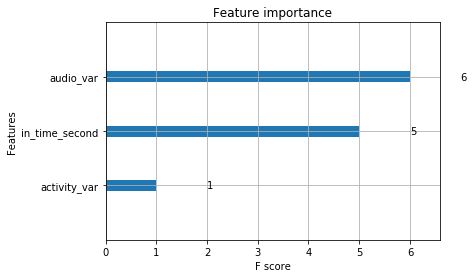

Feature gain: 


{'audio_var': 0.9073040691666666,
 'in_time_second': 0.9222108254,
 'activity_var': 0.569662929}

In [175]:
# select gain > 0.5
X1 = X[['activity_var',
        'in_time_second',
        'audio_var'
       ]]
model = train_xgboost(X1, y)
print('Feature gain: ')
model.get_score(importance_type='gain')

In [178]:
X1 = X[['pre_label']]
model = train_xgboost(X1, y)
model.get_score(importance_type='gain')

Training:
Accuracy for model: 86.96
Testing:
Accuracy for model: 75.00


ValueError: Booster.get_score() results in empty

## Try SVC

In [226]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, cross_val_score, LeaveOneOut

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size=0.33)
X_train

,activity_mean,activity_var,audio_mean,audio_var,bluetooth_sum,bluetooth_var,bluetooth_mean,bluetooth_day_num,conversation_sum,conversation_var,...,phonecharge_mean,phonecharge_day_num,phonelock_sum,phonelock_var,phonelock_mean,phonelock_day_num,in_time_second,near_time_second,in_all_percentage,pre_label
5,0.775667,0.986500,0.513226,0.769667,0.254286,0.000000,0.213769,0.117647,0.472231,0.623581,...,0.512770,0.521739,0.520251,0.000000,0.472561,0.295455,0.164329,0.802091,0.192360,1
15,0.922063,0.994584,0.688371,0.924743,0.852371,0.845109,0.872191,0.264706,0.734218,0.885244,...,0.000000,0.260870,0.474014,1.000000,0.452797,0.227273,0.252964,0.980036,0.018953,0
23,0.500071,0.943839,0.690542,0.631605,0.600980,0.766106,0.610749,0.117647,0.606169,0.616542,...,0.922643,0.304348,0.142736,0.787814,0.172135,0.022727,0.126252,0.741938,0.242064,1
32,0.912933,0.992951,0.662056,0.787009,0.649299,0.652050,0.690706,0.029412,0.459044,0.607591,...,0.880946,0.630435,0.365018,0.289445,0.367607,0.136364,0.000000,0.991433,0.002644,1
33,0.621185,0.969346,0.587586,0.834611,0.922289,1.000000,0.978664,0.117647,0.656434,0.769965,...,0.741167,0.826087,0.744144,0.394496,0.762212,0.386364,0.373150,0.310913,0.662564,1
18,0.670367,0.970317,0.505204,0.773158,0.701403,0.755973,0.665414,0.323529,0.366959,0.425727,...,0.476846,0.217391,0.696697,0.885926,0.809275,0.113636,0.145219,0.874514,0.121658,0
27,0.754155,0.959126,0.574863,0.745729,0.841015,0.816458,0.757099,0.647059,0.626689,0.531659,...,0.590100,0.652174,0.587495,0.598270,0.280187,0.636364,0.488110,0.246900,0.758981,1
11,0.730829,0.983511,0.647730,0.790671,0.567357,0.693505,0.540344,0.205882,0.456137,0.679900,...,0.575532,0.260870,0.382721,0.571081,0.434573,0.068182,0.122885,0.887981,0.106978,1
13,0.813168,0.992597,0.629358,0.679176,0.357159,0.491451,0.384178,0.000000,0.444682,0.419907,...,0.724790,0.195652,0.307033,0.705913,0.370264,0.022727,0.050184,0.881959,0.107528,1
30,0.427137,0.948593,0.639230,0.775243,0.573592,0.734792,0.598774,0.058824,0.563080,0.704216,...,1.000000,0.391304,0.000000,0.418308,0.000000,0.022727,0.050838,0.883750,0.105921,1


In [335]:
# kernel If none is given, ‘rbf’ will be used. 
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
print(clf.predict(X_test))

[1 1 1 1 1 1 1 1 1 1 1 1]


In [215]:
clf.score(X_test, y_test)

1.0

In [214]:
cv_scores = cross_val_score(clf, X_train, y_train, cv=3)
print(cv_scores)
print(min(cv_scores))

[0.75       0.75       0.85714286]
0.75


In [310]:
def pred_post_svc(X, y):
    #X_train, X_test, y_train, y_test = train_test_split(X, y, 
    #                                test_size=0.33, random_state=164520)
    
    X_train = X.iloc[:25,:]
    X_test = X.iloc[25:,:]
    y_train = y[:25]
    y_test = y[25:]
    
    # kernel If none is given, ‘rbf’ will be used. kernel = 'linear',
    classifier = SVC(gamma='auto')
    classifier.fit(X_train, y_train)
    
    train_acc = classifier.score(X_train, y_train)
    print('Train accuracy:', train_acc)

    test_acc = classifier.score(X_test, y_test)
    print('Test accuracy:', test_acc)
    
    # X_train 3 fold
    cv_scores = cross_val_score(classifier, X_train, y_train, cv=3)
    print('cv accuracies:', cv_scores)
    print('min cv acc:', min(cv_scores))
    
    return classifier
     

In [311]:
def feature_importances(coef, names):
    imp = coef
    print(len(coef))
    imp,names = zip(*sorted(zip(imp,names)))
    print(len(imp))
    color = ['blue'] * len(imp)
    for i in range(len(imp)):
        curr_coef = imp[i]
        if curr_coef < 0:
            color[i] = 'red'
    plt.barh(range(len(names)), imp, align='center', color = color)
    plt.yticks(range(len(names)), names)
    plt.show()

In [350]:
classifier = pred_post_svc(X, y)
feature_names = X.columns
#print(len(classifier.coef_[0]))
#feature_importances(classifier.coef_[0], feature_names)

Train accuracy: 0.88
Test accuracy: 0.8181818181818182
cv accuracies: [0.88888889 0.875      0.875     ]
min cv acc: 0.875


In [355]:
missing_post_panas_neg = pd.read_csv('../train_missing_post/panas_missing_post.csv')
missing_post_panas_neg = missing_post_panas_neg.iloc[:,2:].drop(columns = ['uid',
                                                                            'pre_positive',
                                                                            'post_positive',
                                                                            #'pre_negative',
                                                                            'post_negative',
                                                                            'post_positive_label',
                                                                            #'pre_positive_label',
                                                                            'post_negative_label'
                                                                           ])
missing_post_panas_neg

,activity_mean,activity_var,audio_mean,audio_var,bluetooth_sum,bluetooth_var,bluetooth_mean,bluetooth_day_num,conversation_sum,conversation_var,...,phonelock_sum,phonelock_var,phonelock_mean,phonelock_day_num,in_time_second,near_time_second,in_all_percentage,pre_negative,pre_positive_label,pre_negative_label
0,0.517925,0.987256,0.344620,0.807094,0.252282,0.226909,0.195273,0.147059,0.139547,0.661129,...,0.488147,0.845239,0.565742,0.068182,0.124378,0.884825,0.110120,26,1,1
1,0.683006,0.977512,0.508076,0.854818,0.683589,0.735824,0.735304,0.000000,0.300893,0.736296,...,0.148080,0.815018,0.195738,0.000000,0.060343,0.906222,0.085580,18,1,1
2,0.782539,0.983007,0.696021,0.875130,0.415720,0.422302,0.357885,0.205882,0.603108,0.725621,...,0.586105,0.391729,0.621959,0.204545,0.184436,0.842960,0.155724,21,0,1
3,0.690311,0.978731,0.680566,0.516138,0.839679,0.863708,0.850252,0.294118,0.717632,0.538455,...,0.431321,0.201994,0.424666,0.181818,0.014467,0.949291,0.042957,15,1,1
4,0.995067,1.000000,0.909583,0.983161,0.820753,0.882326,0.676874,0.764706,0.905969,0.948929,...,0.802037,0.072619,0.612335,0.772727,0.488855,1.000000,0.000000,13,1,1
5,0.235266,0.965252,0.151941,0.735765,0.389223,0.505931,0.418668,0.000000,0.168410,0.663342,...,0.398641,0.842263,0.493313,0.000000,0.064323,0.854976,0.133391,12,1,0
6,0.724696,0.979177,0.426914,0.364465,0.797818,0.841591,0.841909,0.088235,0.364826,0.349566,...,0.279118,0.360985,0.289446,0.090909,0.076454,0.970403,0.024504,15,1,1


In [356]:
missing_post_panas_neg = pd.read_csv('../train_missing_post/panas_missing_post.csv')
missing_post_panas_neg

,Unnamed: 0,Unnamed: 0.1,uid,activity_mean,activity_var,audio_mean,audio_var,bluetooth_sum,bluetooth_var,bluetooth_mean,...,near_time_second,in_all_percentage,pre_positive,post_positive,pre_negative,post_negative,pre_positive_label,post_positive_label,pre_negative_label,post_negative_label
0,7,7,u08,0.517925,0.987256,0.344620,0.807094,0.252282,0.226909,0.195273,...,0.884825,0.110120,30,0,26,0,1,-1,1,-1
1,10,10,u12,0.683006,0.977512,0.508076,0.854818,0.683589,0.735824,0.735304,...,0.906222,0.085580,42,0,18,0,1,-1,1,-1
2,11,11,u13,0.782539,0.983007,0.696021,0.875130,0.415720,0.422302,0.357885,...,0.842960,0.155724,13,0,21,0,0,-1,1,-1
3,19,19,u22,0.690311,0.978731,0.680566,0.516138,0.839679,0.863708,0.850252,...,0.949291,0.042957,26,0,15,0,1,-1,1,-1
4,35,35,u50,0.995067,1.000000,0.909583,0.983161,0.820753,0.882326,0.676874,...,1.000000,0.000000,25,0,13,0,1,-1,1,-1
5,40,41,u57,0.235266,0.965252,0.151941,0.735765,0.389223,0.505931,0.418668,...,0.854976,0.133391,35,0,12,0,1,-1,0,-1
6,41,42,u58,0.724696,0.979177,0.426914,0.364465,0.797818,0.841591,0.841909,...,0.970403,0.024504,28,0,15,0,1,-1,1,-1


In [352]:
classifier.predict(missing_post_panas_neg)

array([1, 1, 1, 1, 1, 1, 1])

In [332]:
missing_post_panas_pos[:5]

,activity_mean,activity_var,audio_mean,audio_var,bluetooth_sum,bluetooth_var,bluetooth_mean,bluetooth_day_num,conversation_sum,conversation_var,...,phonecharge_mean,phonecharge_day_num,phonelock_sum,phonelock_var,phonelock_mean,phonelock_day_num,in_time_second,near_time_second,in_all_percentage,post_positive_label
0,0.517925,0.987256,0.344620,0.807094,0.252282,0.226909,0.195273,0.147059,0.139547,0.661129,...,0.638024,0.108696,0.488147,0.845239,0.565742,0.068182,0.124378,0.884825,0.110120,-1
1,0.683006,0.977512,0.508076,0.854818,0.683589,0.735824,0.735304,0.000000,0.300893,0.736296,...,0.271239,0.152174,0.148080,0.815018,0.195738,0.000000,0.060343,0.906222,0.085580,-1
2,0.782539,0.983007,0.696021,0.875130,0.415720,0.422302,0.357885,0.205882,0.603108,0.725621,...,0.581489,0.347826,0.586105,0.391729,0.621959,0.204545,0.184436,0.842960,0.155724,-1
3,0.690311,0.978731,0.680566,0.516138,0.839679,0.863708,0.850252,0.294118,0.717632,0.538455,...,0.788779,0.478261,0.431321,0.201994,0.424666,0.181818,0.014467,0.949291,0.042957,-1
4,0.995067,1.000000,0.909583,0.983161,0.820753,0.882326,0.676874,0.764706,0.905969,0.948929,...,0.625818,1.000000,0.802037,0.072619,0.612335,0.772727,0.488855,1.000000,0.000000,-1


In [306]:
missing_post = pd.read_csv('../train_missing_post/flourishing_missing_post.csv')
missing_post = missing_post.iloc[:,2:]
missing_post[:5]

,uid,activity_mean,activity_var,audio_mean,audio_var,bluetooth_sum,bluetooth_var,bluetooth_mean,bluetooth_day_num,conversation_sum,...,phonelock_var,phonelock_mean,phonelock_day_num,in_time_second,near_time_second,in_all_percentage,pre_score,post_socre,pre_label,post_label
0,u08,0.517925,0.987256,0.344620,0.807094,0.252282,0.226909,0.195273,0.147059,0.139547,...,0.845239,0.565742,0.068182,0.124378,0.884825,0.110120,39,0,1,-1
1,u12,0.683006,0.977512,0.508076,0.854818,0.683589,0.735824,0.735304,0.000000,0.300893,...,0.815018,0.195738,0.000000,0.060343,0.906222,0.085580,49,0,1,-1
2,u13,0.782539,0.983007,0.696021,0.875130,0.415720,0.422302,0.357885,0.205882,0.603108,...,0.391729,0.621959,0.204545,0.184436,0.842960,0.155724,44,0,1,-1
3,u18,0.848728,0.987181,0.695423,0.707417,0.769762,0.555100,0.615582,0.705882,0.637032,...,0.238759,0.546201,0.409091,0.087334,0.936908,0.057638,37,0,1,-1
4,u22,0.690311,0.978731,0.680566,0.516138,0.839679,0.863708,0.850252,0.294118,0.717632,...,0.201994,0.424666,0.181818,0.014467,0.949291,0.042957,46,0,1,-1


In [307]:
X_missing_post = missing_post.drop(columns = ['uid','pre_score','post_socre','post_label'])
X_missing_post[:5]

,activity_mean,activity_var,audio_mean,audio_var,bluetooth_sum,bluetooth_var,bluetooth_mean,bluetooth_day_num,conversation_sum,conversation_var,...,phonecharge_mean,phonecharge_day_num,phonelock_sum,phonelock_var,phonelock_mean,phonelock_day_num,in_time_second,near_time_second,in_all_percentage,pre_label
0,0.517925,0.987256,0.344620,0.807094,0.252282,0.226909,0.195273,0.147059,0.139547,0.661129,...,0.638024,0.108696,0.488147,0.845239,0.565742,0.068182,0.124378,0.884825,0.110120,1
1,0.683006,0.977512,0.508076,0.854818,0.683589,0.735824,0.735304,0.000000,0.300893,0.736296,...,0.271239,0.152174,0.148080,0.815018,0.195738,0.000000,0.060343,0.906222,0.085580,1
2,0.782539,0.983007,0.696021,0.875130,0.415720,0.422302,0.357885,0.205882,0.603108,0.725621,...,0.581489,0.347826,0.586105,0.391729,0.621959,0.204545,0.184436,0.842960,0.155724,1
3,0.848728,0.987181,0.695423,0.707417,0.769762,0.555100,0.615582,0.705882,0.637032,0.507125,...,0.210958,0.717391,0.618870,0.238759,0.546201,0.409091,0.087334,0.936908,0.057638,1
4,0.690311,0.978731,0.680566,0.516138,0.839679,0.863708,0.850252,0.294118,0.717632,0.538455,...,0.788779,0.478261,0.431321,0.201994,0.424666,0.181818,0.014467,0.949291,0.042957,1


In [313]:
pred_missing_post = classifier.predict(X_missing_post)
pred_missing_post

array([1, 1, 1, 1, 1, 1, 1, 1])

Train accuracy: 0.9130434782608695
Test accuracy: 0.9166666666666666
cv accuracies: [0.75       1.         0.71428571]
min cv acc: 0.7142857142857143
24
24


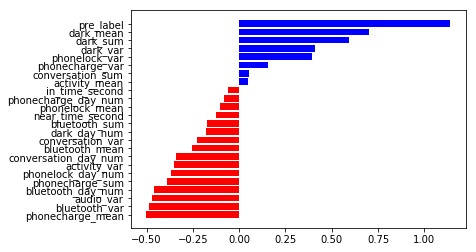

In [296]:
X1 = X.drop(columns=['in_all_percentage', 'phonelock_sum','audio_mean','conversation_mean'])
classifier = pred_post_svc(X1, y)
feature_names = X1.columns

feature_importances(classifier.coef_[0], feature_names)

In [271]:
feature_names

Index(['activity_mean', 'activity_var', 'audio_mean', 'audio_var',
       'bluetooth_sum', 'bluetooth_var', 'bluetooth_mean', 'bluetooth_day_num',
       'conversation_sum', 'conversation_var', 'conversation_mean',
       'conversation_day_num', 'dark_sum', 'dark_var', 'dark_mean',
       'dark_day_num', 'phonecharge_sum', 'phonecharge_var',
       'phonecharge_mean', 'phonecharge_day_num', 'phonelock_sum',
       'phonelock_var', 'phonelock_mean', 'phonelock_day_num',
       'in_time_second', 'near_time_second', 'in_all_percentage', 'pre_label'],
      dtype='object')

In [ ]:
    # n-1 fold: leave one out  (LOO)
    print('leave one out: ')
    loo = LeaveOneOut()
    for loo_train, loo_test in loo.split(X_train):
        #print("%s %s" % (loo_train, loo_test))
        print(type(X_train))
        loo_train
        clf.fit(X_train.iloc[loo_train,:], y_train.iloc[loo_train,:])
        
        test_acc = clf.score(X_test.iloc[loo_test,:], y_test.iloc[loo_test,:])
        print('Test accuracy:', test_acc)